<a href="https://colab.research.google.com/github/renfazio/ADM-HW4/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Per-processing

In [ ]:
#Import Dataset
df = pd.read_csv("/content/drive/MyDrive/ADM HW4/movies.csv")
# Get information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671736 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    671736 non-null  int64  
 1   datetime      671736 non-null  object 
 2   duration      671736 non-null  float64
 3   title         671736 non-null  object 
 4   genres        671736 non-null  object 
 5   release_date  671736 non-null  object 
 6   movie_id      671736 non-null  object 
 7   user_id       671736 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.0+ MB


From this output we can see that we didn't have any null values, cause as we can see from 671736 entries we dont have any null value in the column Non-Null Count

In [ ]:
df.drop_duplicates()

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287
...,...,...,...,...,...,...,...,...
671731,730504,2019-06-30 21:37:08,851.0,Oprah Presents When They See Us Now,Talk-Show,2019-06-12,43cd23f30f,57501964fd
671732,730505,2019-06-30 21:49:34,91157.0,HALO Legends,"Animation, Action, Adventure, Family, Sci-Fi",2010-02-16,febf42d55f,d4fcb079ba
671733,730506,2019-06-30 22:00:44,0.0,Pacific Rim,"Action, Adventure, Sci-Fi",2013-07-12,7b15e5ada1,4a14a2cd5a
671734,730507,2019-06-30 22:04:23,0.0,ReMastered: The Two Killings of Sam Cooke,"Documentary, Music",2019-02-08,52d49c515a,0b8163ea4b


We also don't have any duplicated values

Drop all the row with 'NOT AVAILABLE' genre

In [ ]:
df = df[df['genres'] != 'NOT AVAILABLE']

# Convert the values in datetime columns from string to datetime

In [ ]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df.release_date = pd.to_datetime(df.release_date, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645175 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    645175 non-null  int64         
 1   datetime      645175 non-null  datetime64[ns]
 2   duration      645175 non-null  float64       
 3   title         645175 non-null  object        
 4   genres        645175 non-null  object        
 5   release_date  639842 non-null  datetime64[ns]
 6   movie_id      645175 non-null  object        
 7   user_id       645175 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 44.3+ MB


# Ex 1. Recommendation sytem

Implementing a recommendation system is critical for businesses and digital platforms that want to thrive in today's competitive environment. These systems use data-driven personalization to tailor content, products, and services to individual user preferences. The latter improves user engagement, satisfaction, retention, and revenue through increased sales and cross-selling opportunities. In this section, you will attempt to implement a recommendation system by identifying similar users' preferences and recommending movies they watch to the study user.

To be more specific, you will implement your version of the LSH algorithm, which will take as input the user's preferred genre of movies, find the most similar users to this user, and recommend the most watched movies by those who are more similar to the user.

Data: The data you will be working with can be found here.

# 1.1
Looking at the data, you can see that there is data available for each user for the movies the user clicked on. Gather the title and genre of the maximum top 10 movies that each user clicked on regarding the number of clicks.

In [ ]:
df_groupedby_TitleAndGenres = df.groupby(['title','genres']).size().reset_index(name = 'count').sort_values(by='count', ascending = False)
df_groupedby_TitleAndGenres [:10]

,title,genres,count
914,Black Mirror: Bandersnatch,"Drama, Mystery, Sci-Fi, Thriller",6436
1074,Bright,"Action, Fantasy, Thriller",3110
617,Avengers: Age of Ultron,"Action, Adventure, Sci-Fi",2898
515,Annihilation,"Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...",2699
2671,Hot Fuzz,"Action, Comedy, Mystery, Thriller",2674
1567,Deadpool,"Action, Adventure, Comedy, Sci-Fi",2576
898,Bird Box,"Drama, Horror, Sci-Fi",2549
1986,FYRE: The Greatest Party That Never Happened,"Documentary, Music",2332
5747,The Big Short,"Biography, Comedy, Drama, History",2204
6146,The Hitman's Bodyguard,"Action, Comedy, Crime, Thriller",2179


We  collect the titles and genres of the most popular movies based on the highest number of clicks by users. Each entry in the data frame represents a user's click on a specific netflix.com/watch URL associated with a movie.

# 1.2 Minhash Signatures
Using the movie genre and user_ids, try to implement your min-hash signatures so that users with similar interests in a genre appear in the same bucket.

Important note: You must write your minhash function from scratch. You are not permitted to use any already implemented hash functions.
Read the class materials and, if necessary, conduct an internet search. The description of hash functions in the book may be helpful as a reference.

Collect unique genres encountered across the DataFrame

In [ ]:
df['genres_list'] = df.genres.apply(lambda row: [word.strip() for word in row.split(',')])

# Get all the movie's genres we Will encounter in this data frame:
unique_genres = set()
df['genres_list'].apply(lambda row: [unique_genres.add(value) for value in row])

0                           [None, None, None]
1                     [None, None, None, None]
2                                 [None, None]
3                                 [None, None]
4         [None, None, None, None, None, None]
                          ...                 
671731                                  [None]
671732          [None, None, None, None, None]
671733                      [None, None, None]
671734                            [None, None]
671735                            [None, None]
Name: genres_list, Length: 645175, dtype: object

Create a Dictionary with key = genre an values the 'positions', we are gonna use it for create the buckets

In [ ]:
serial_dict = {value: index for index, value in enumerate(unique_genres)}
serial_dict

{'Musical': 0,
 'Western': 1,
 'Talk-Show': 2,
 'History': 3,
 'Family': 4,
 'Film-Noir': 5,
 'War': 6,
 'Mystery': 7,
 'Adventure': 8,
 'Drama': 9,
 'Sport': 10,
 'Fantasy': 11,
 'Action': 12,
 'Crime': 13,
 'Reality-TV': 14,
 'Biography': 15,
 'Thriller': 16,
 'Sci-Fi': 17,
 'Horror': 18,
 'News': 19,
 'Documentary': 20,
 'Short': 21,
 'Comedy': 22,
 'Music': 23,
 'Romance': 24,
 'Animation': 25}

Get all the ids of the users

In [ ]:
unique_ids = set()
df['user_id'].apply(lambda row: unique_ids.add(row))

0         None
1         None
2         None
3         None
4         None
          ... 
671731    None
671732    None
671733    None
671734    None
671735    None
Name: user_id, Length: 645175, dtype: object

Generate a binary matrix where rows represent users and columns encompass all film genres. Each cell in the table will contain a binary value indicating whether the user associated with the row has watched a film of that genre (1 if yes, 0 otherwise).

In [ ]:
binary_matrix = [
    [1 if genre in dict_genres[key] else 0 for genre in unique_genres]
    for key in dict_genres.keys()
]
shingle_df = pd.DataFrame(binary_matrix, index=dict_genres.keys(), columns=list(unique_genres))
shingle_df

,Musical,Western,Talk-Show,History,Family,Film-Noir,War,Mystery,Adventure,Drama,...,Thriller,Sci-Fi,Horror,News,Documentary,Short,Comedy,Music,Romance,Animation
af4f111bfb,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
eeae3d1fe7,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
f081bdd6ea,0,0,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,1,0,1,0
faa1d64ddc,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
d11aeeb142,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52e6983b3d,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3ac03dc106,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7e4edd430a,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
ee4f2a36dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Generate a minhash function from scratch

In [ ]:
def minhash_signature(binary_matrix, num_hashes):
    num_users, num_genres = binary_matrix.shape

    # Initialize hash functions to permute the columns
    column_permutations = [np.random.permutation(num_genres) for _ in range(num_hashes)]

    # Initialize the signature matrix with infinity
    signature_matrix = np.full((num_users, num_hashes), np.inf)

    # Compute MinHash signatures
    for i, perm in enumerate(column_permutations):
        for user_idx in range(num_users):
            # Find the first occurrence of 1 after the permutation
            first_one_index = np.where(binary_matrix.values[user_idx, perm] == 1)[0]
            if len(first_one_index) > 0:
                signature_matrix[user_idx, i] = first_one_index[0] + 1

    return pd.DataFrame(signature_matrix, index=binary_matrix.index, columns=[f'H{i+1}' for i in range(num_hashes)])

num_hashes = 10
signature_df = minhash_signature(shingle_df, num_hashes)
print(signature_df)

             H1    H2    H3    H4    H5    H6    H7    H8   H9   H10
af4f111bfb  1.0  10.0   6.0   1.0   4.0   3.0   4.0   2.0  5.0   1.0
eeae3d1fe7  1.0   4.0   6.0   8.0   9.0   3.0   3.0   2.0  4.0   2.0
f081bdd6ea  1.0   4.0   6.0   2.0   2.0   3.0   1.0   2.0  1.0   2.0
faa1d64ddc  2.0   4.0   6.0   9.0   6.0   3.0   1.0   5.0  2.0  11.0
d11aeeb142  6.0   4.0   6.0  12.0  17.0   3.0   7.0   6.0  3.0  22.0
...         ...   ...   ...   ...   ...   ...   ...   ...  ...   ...
52e6983b3d  1.0   7.0   6.0   4.0   2.0   3.0   3.0   2.0  4.0   2.0
3ac03dc106  1.0  19.0  11.0   5.0  19.0  15.0  21.0   2.0  6.0   2.0
7e4edd430a  1.0   4.0  12.0   4.0   2.0   8.0   6.0   2.0  9.0   2.0
ee4f2a36dd  7.0  10.0  21.0  21.0   4.0  17.0   4.0  10.0  8.0  20.0
07a9f769a8  2.0   4.0   6.0   2.0   6.0   3.0   1.0   5.0  1.0   7.0

[1001 rows x 10 columns]


Function for get the Jaccard similarity between two sets.

It compare their intersection to their union and get in output a ratio where 1 indicates identical sets and 0 indicates no common elements.

In [ ]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0.0

Generete the buckets where in each of it there are users with similar interests in a genre

In [ ]:
from collections import defaultdict

def create_buckets(signature_matrix, threshold=0.6):
    num_users, num_hashes = signature_matrix.shape
    user_ids = signature_matrix.index.values

    # Initialize buckets dictionary
    buckets = defaultdict(list)

    row_hashes = [hash(tuple(signature_matrix.loc[user])) for user in user_ids]

    # Create buckets based on hashed values
    for user_idx,id in enumerate(user_ids):
        buckets[row_hashes[user_idx]].append(id)
    print(buckets)
    # Filter buckets based on the threshold
    similar_buckets = defaultdict(set)

    for bucket_key, bucket_values in buckets.items():
        # Check if the bucket has more than one user
        if len(bucket_values) > 1:
            # Compare Jaccard similarity for pairs of users in the bucket
            for i in range(len(bucket_values)):
                for j in range(i + 1, len(bucket_values)):
                    # Calculate Jaccard similarity between sets
                    similarity = jaccard_similarity(
                        set(signature_matrix.loc[bucket_values[i]]),
                        set(signature_matrix.loc[bucket_values[j]])
                    )

                    # Check if similarity exceeds the threshold
                    if similarity >= threshold:
                        similar_buckets[bucket_key].update(list(bucket_values))  # Extend the list of users

                        # Break to avoid adding the same bucket multiple times
                        break

    return similar_buckets

buckets = create_buckets(signature_df)

defaultdict(<class 'list'>, {-7690613369633243677: ['af4f111bfb', '031a58eef6'], 4879174100043333494: ['eeae3d1fe7'], 1932556868126004443: ['f081bdd6ea', 'e659d5d083', '9a8fd71406', '6852da9c17', '679245d11c', '4fc7f1f168', '92555b421e', '38b836f118', 'b69413ea5a'], 5163213754993932739: ['faa1d64ddc'], -4013192763653864607: ['d11aeeb142'], -5031659635859442703: ['e114862545', 'eec12564d0', '341c7a35e7', '4e4fa7d327', '78950437fa', '54254eea0f', '2fe4ae6cc7', '4c67e6c01f', '9f418d6027', '55cafdb1b0', '9871a5e2af', '49083d3c65', '1b2442831f'], -882851173017345415: ['26e2b95dd9'], -3888331912689230553: ['c0617c49df'], -4232877523179794914: ['2f7ff98ba7', 'ccd1f1794f', '3f35b72673', '71806eb4d5', 'f3d0ddc0a2', 'd8c5b0efc6'], 7677309311317404381: ['c9238c0856', '5fa74024dd', '17a2bb7d55', 'af03f4b625', 'b4cfafde15', '81c14bf641', '09c77fe127', '543b167f2e', '5c314785f7', '4d71999332', 'a1996d1a97', '7b98ce80fb', '6311458952', '76bc6a0bb9', 'f14f6ef8d1', '449a065426', '9b48a94e68', '9886fbd5

# 1.3 Locality-Sensitive Hashing (LSH)
Now that your buckets are ready, it's time to ask a few queries. We will provide you with some user_ids and ask you to recommend at most five movies to the user to watch based on the movies clicked by similar users.

To recommend at most five movies given a user_id, use the following procedure:

1.   Identify the two most similar users to this user.
2.   If these two users have any movies in common, recommend those movies based on the total number of clicks by these users.
3.   If there are no more common movies, try to propose the most clicked movies by the most similar user first, followed by the other user.


Note: At the end of the process, we expect to see at most five movies recommended to the user.

Find the two most similar users by calculates similarities between the given user and others in the same bucket using Jaccard similarity

In [ ]:
def find_similar_users(signature_matrix, user_id, buckets, top_n=2):

  user_bucket = buckets[hash(tuple(signature_matrix.loc[user_id]))]

  # Calculate similarities between the given user and others in the same bucket
  similarities = {}
  given_user_signature = set(signature_matrix.loc[user_id])

  for other_user_id in user_bucket:
      if other_user_id != user_id:
          other_user_signature = set(signature_matrix.loc[other_user_id])
          similarity = jaccard_similarity(given_user_signature, other_user_signature)
          similarities[other_user_id] = similarity

  # Sort users based on similarity
  sorted_similar_users = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

  # Extract top N similar users
  top_similar_users = sorted_similar_users[:top_n]

  return top_similar_users

Example usage


In [ ]:
user_id = 'a40143ea18'

similar_users = find_similar_users(signature_df, user_id, buckets)
if isinstance(similar_users, str):
    print(similar_users)  # User not found in any bucket
else:
    print(f"Two most similar users to {user_id}:")
    for user_id, similarity_score in similar_users:
      print(f"User ID: {user_id}, Similarity Score: {similarity_score}")

Two most similar users to a40143ea18:
User ID: 99b8808595, Similarity Score: 1.0
User ID: 171a19a287, Similarity Score: 1.0


Get all the movies that the two similar users had watch

In [ ]:
# List of user_id from the similar_users
similar_users_id = [userID_and_score[0] for userID_and_score in similar_users]

# Make a filtered df for user in the similar_users_id list
similar_movies = df[df['user_id'].isin(similar_users_id)]

Get the movies whatched by the similar users

In [ ]:
# Count occurrances
movie_id_counts_similar = similar_movies.groupby(['user_id', 'movie_id', 'title']).size().reset_index(name='count')

# Initialize two sets so we can do intersection function later
user_a = set()
user_b = set()

# Get the movies whatched by the first similar user
filtered_df_a = movie_id_counts_similar[movie_id_counts_similar['user_id'] == similar_users_id[0]]
user_a.update(filtered_df_a['movie_id'].unique())

# Get the movies whatched by the second similar user
filtered_df_b = movie_id_counts_similar[movie_id_counts_similar['user_id'] == similar_users_id[1]]
user_b.update(filtered_df_b['movie_id'].unique())


Get the films in common between the two similar users.

If there aren't, get the most clicked movies by the most similar user first, followed by the other user.

In [ ]:
# Use the intersection function to see the films in common between the two similar users
similar_common_movies = list(user_a.intersection(user_b))
similar_noncommon_movies = list(user_a.union(user_b))

# List in descending order by click the movies seen by both users and those watched indiviually by them
result_common = movie_id_counts_similar[movie_id_counts_similar['movie_id'].isin(similar_common_movies)].groupby(['title']).agg({'count': 'sum'}).reset_index().sort_values(by='count', ascending=False)
result_noncommon = movie_id_counts_similar[movie_id_counts_similar['movie_id'].isin(similar_noncommon_movies)].sort_values(by='count', ascending=False)[['title', 'count']]

# concatenate so that we will first see the ones in result_common (seen by both) and then the once which they did not both see
concatenated_result = pd.concat([result_common, result_noncommon])

# show top 5 movies
concatenated_result.head(5)

,title,count
0,Sky Captain and the World of Tomorrow,1
1,Thor: The Dark World,1
2,Young Frankenstein,1
3,Bunks,1
4,Source Code,1


## 2.1 Getting your data + feature engineering

2.1)   **Getting your data**



Let us take the data that we are going to work with in the following steps and look at the structure of our dataframe in the first five rows.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ADM/HW_4 /vodclickstream_uk_movies_03.csv')
dataset.head()

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287


From the information we are given [[link](https://www.kaggle.com/datasets/vodclickstream/netflix-audience-behaviour-uk-movies)] we know that the dataset covers the behaviour of Netflix users in the UK. It documents every time the user clicked on Netflix.com/watch URL for a movie. The variable 'duration' indicates in seconds how long it takes for a user to click on another URL. If it is equal to zero, it means that the user visited the page but instantly clicked away.

Let us check the various information we can get from the dataset and we will proceed to execute the preprocessing by cleaning the various data.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671736 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    671736 non-null  int64  
 1   datetime      671736 non-null  object 
 2   duration      671736 non-null  float64
 3   title         671736 non-null  object 
 4   genres        671736 non-null  object 
 5   release_date  671736 non-null  object 
 6   movie_id      671736 non-null  object 
 7   user_id       671736 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.0+ MB


In [ ]:
# Let us convert our variables 'datetime' and 'release_date' from string variables to datatime.
dataset.datetime = pd.to_datetime(dataset.datetime)
dataset.release_date = pd.to_datetime(dataset.release_date, errors='coerce')

In [ ]:
# Remove all the values that are negative in the variable 'duration'
dataset.drop(dataset[dataset["duration"] < 0].index, inplace = True)
# Convert into a list the 'genres' and split the values by commas
dataset["genres"] = dataset["genres"].apply(lambda x: x.split(", "))

**Feature engineering**

In the first part of this exercise, we will create new variables for each user_id. Knowing that the same user can have more than one click, we will  group the data by user_id. We will start with the first five features that were recommended by the homework.


Knowing that we subsequently have to merge all our new variables, we create a different dataframe for each new variable.

a) The first feature is about **favorite genre** :

We have to find the favourite genre for each user, so we calculate out of all the genres that a user has seen, the one in which they have spent the most time. This will represent their favourite genre.

In [ ]:
# Knowing that every movie has different genres we create multiple rows for each genre in the original dataset
df1 = dataset.explode('genres')
# Group by 'user_id' and 'genres_list', and calculate the total duration for each combination
df1 = df1.groupby(['user_id', 'genres'])['duration'].sum().reset_index()
# For each user, keep the maximum total duration
df1 = df1.loc[df1.groupby('user_id')['duration'].idxmax()]
# Rename columns
df1 = df1.rename(columns={'genres': 'Favorite_Genre'})
df1

,user_id,Favorite_Genre,duration
0,00004e2862,Crime,0.0
3,000052a0a0,Action,37270.0
17,000090e7c8,Mystery,0.0
20,000118a755,Horror,0.0
22,000296842d,Drama,77308.0
...,...,...,...
827596,fffd9bf758,Crime,8495.0
827599,fffe7b777b,Drama,1785.0
827606,fffeac83be,Drama,355099.0
827611,ffff2c5f9e,Action,0.0


b) The second feature is about **average click duration**:

The column represents, on average, how much time a user spends watching the movies before clicking on another URL.

In [ ]:
# Group by 'user_id' and calculate the mean duration for each user
df2=dataset.groupby(by='user_id').duration.mean().reset_index()
# Rename the column duration
df2 = df2.rename(columns={'duration': 'average_duration'})
df2

,user_id,average_duration
0,00004e2862,0.000000
1,000052a0a0,2024.166667
2,000090e7c8,0.000000
3,000118a755,0.000000
4,000296842d,11044.000000
...,...,...
154383,fffd9bf758,8495.000000
154384,fffe7b777b,1785.000000
154385,fffeac83be,40606.272727
154386,ffff2c5f9e,0.000000


 c) The third feature is about **time of the day**:

 By dividing the day into these different time categories morning [0-12], afternoon [12-18] and night [18-24], we calculate in which period the user spends the most time on the platform.


In [ ]:
# Create a new column that divides the day into (Morning/Afternoon/Night)
dataset['time_of_day'] = pd.cut(dataset['datetime'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Night'], right=False)

# Group by 'user_id' and 'time_of_day', calculating the sum of 'duration' for each moment of the day
df3 = dataset.groupby(['user_id', 'time_of_day'])['duration'].sum().reset_index()

# Find the time_of_day with the maximum total duration for each user
idx = df3.groupby('user_id')['duration'].idxmax()
df3 = df3.loc[idx]
df3

,user_id,time_of_day,duration
0,00004e2862,Morning,0.0
5,000052a0a0,Night,28962.0
6,000090e7c8,Morning,0.0
9,000118a755,Morning,0.0
12,000296842d,Morning,63767.0
...,...,...,...
463151,fffd9bf758,Night,8495.0
463153,fffe7b777b,Afternoon,1785.0
463157,fffeac83be,Night,397229.0
463158,ffff2c5f9e,Morning,0.0


d) The fourth feature is about **lover of old movies**:

We have to create a variable that tells me whether or not the user is a fan of old movies. First we go to consider new movies those that were released after 2010. We create the variable by counting for each user the number of times a user has watched movies that were released after 2010 and how many movies they have watched that were released before. We consider the user a lover of old movies only if the number of old movies is greater than that of new movies, in this case its variable would be True.

In [ ]:
# Categorizing movies as 'Old' or 'New'
dataset['OldNew'] = dataset['release_date'].apply(lambda x: 'Old' if x.year <= 2010 else 'New')
# Group by 'user_id' and count the number of 'Old' and 'New' movies watched by each user, using unstack() that is going to create a two-dimensional DataFrame
# Fill any missing values with 0
df4 = dataset.groupby('user_id')['OldNew'].value_counts().unstack().fillna(0).reset_index()
# Calculate whether each user is more into old or new movies
df4['Old_movie_lover'] = df4['Old'] > df4['New']
df4

OldNew,user_id,New,Old,Old_movie_lover
0,00004e2862,0.0,1.0,True
1,000052a0a0,15.0,9.0,False
2,000090e7c8,1.0,0.0,False
3,000118a755,2.0,1.0,False
4,000296842d,7.0,0.0,False
...,...,...,...,...
154383,fffd9bf758,1.0,0.0,False
154384,fffe7b777b,1.0,0.0,False
154385,fffeac83be,9.0,2.0,False
154386,ffff2c5f9e,1.0,1.0,False


e) The fifth feature is about **average time spent a day**:

We calculate the average that each user spends per day watching a movie before moving on to another page.

In [ ]:
# Extracting the date from the 'datetime' column
dataset['date'] = dataset['datetime'].dt.date
# Group by 'user_id' and 'date', summing up the 'duration' for each day
df5 = dataset.groupby(['user_id', 'date'])['duration'].sum().reset_index()
# Calculate the mean for each user
df5 = df5.groupby('user_id')['duration'].mean().reset_index()
# Rename the column duration
df5 = df5.rename(columns={'duration': 'average_duration_day'})
df5

,user_id,average_duration_day
0,00004e2862,0.000
1,000052a0a0,4858.000
2,000090e7c8,0.000
3,000118a755,0.000
4,000296842d,38654.000
...,...,...
154383,fffd9bf758,8495.000
154384,fffe7b777b,1785.000
154385,fffeac83be,55833.625
154386,ffff2c5f9e,0.000


**Merge dataframes**

We are going to merge all the dataframes created by merging through user_id all the five variables that were previously created.

In [ ]:
# Combine all the different dataframes
dataset_user = (df1[['user_id', 'Favorite_Genre']]
    .merge(df2[['user_id', 'average_duration']], on='user_id', how='inner')
    .merge(df3[['user_id', 'time_of_day']], on='user_id', how='inner')
    .merge(df4[['user_id', 'Old_movie_lover']], on='user_id', how='inner')
    .merge(df5[['user_id', 'average_duration_day']], on='user_id', how='inner'))

In [ ]:
dataset_user

,user_id,Favorite_Genre,average_duration,time_of_day,Old_movie_lover,average_duration_day
0,00004e2862,Crime,0.000000,Morning,True,0.000
1,000052a0a0,Action,2024.166667,Night,False,4858.000
2,000090e7c8,Mystery,0.000000,Morning,False,0.000
3,000118a755,Horror,0.000000,Morning,False,0.000
4,000296842d,Drama,11044.000000,Morning,False,38654.000
...,...,...,...,...,...,...
154383,fffd9bf758,Crime,8495.000000,Night,False,8495.000
154384,fffe7b777b,Drama,1785.000000,Afternoon,False,1785.000
154385,fffeac83be,Drama,40606.272727,Night,False,55833.625
154386,ffff2c5f9e,Action,0.000000,Morning,False,0.000


Asking CHAT GPT to suggest ten more features to create.

6. **Number of Movies Watched**:

Count the number of movies each user has watched.

In [ ]:
# Group by 'user_id' and count the number of movies for each user
df6 = dataset.groupby('user_id')['movie_id'].count().reset_index()
# Rename the column
df6 = df6.rename(columns={'movie_id': 'Number_of_Movies'})
df6

,user_id,Number_of_Movies
0,00004e2862,1
1,000052a0a0,24
2,000090e7c8,1
3,000118a755,3
4,000296842d,7
...,...,...
154383,fffd9bf758,1
154384,fffe7b777b,1
154385,fffeac83be,11
154386,ffff2c5f9e,2


7. **Maximum interaction duration**:

Find the maximum duration recorded in the user's interactions.

In [ ]:
# Group by 'user_id' and find the longest 'duration' for each user
df7 = dataset.groupby('user_id')['duration'].max().reset_index()
# Rename the column
df7 = df7.rename(columns={'duration': 'Longest_duration'})
df7

,user_id,Longest_duration
0,00004e2862,0.0
1,000052a0a0,7857.0
2,000090e7c8,0.0
3,000118a755,0.0
4,000296842d,62860.0
...,...,...
154383,fffd9bf758,8495.0
154384,fffe7b777b,1785.0
154385,fffeac83be,173436.0
154386,ffff2c5f9e,0.0


8. **Weekday or Weekend Preference**:

We count how many movies were watched by each user during the weekend and compare it with the number of times they watched a movies during the weekdays. If the user has a higher preference on the weekend he is considered a weekend lover by our new variable.

In [ ]:
# Extracting the day name from the 'datetime' column
dataset['day_of_week'] = dataset['datetime'].dt.day_name()

In [ ]:
# Define a function to determine if a day is a 'Weekday' or 'Weekend'
def weekday_or_weekend(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 'Weekday'
    else:
        return 'Weekend'

In [ ]:
# Apply the function
dataset['Weekday_Weekend'] = dataset['day_of_week'].apply(weekday_or_weekend)
# Group by 'user_id' and count the number of 'Weekday' and 'Weekend'
df8 = dataset.groupby('user_id')['Weekday_Weekend'].value_counts().unstack().fillna(0).reset_index()
# New column 'Weekend_lover' based on the condition that 'Weekend' counts are greater than 'Weekday'
df8['Weekend_lover'] = df8['Weekend'] > df8['Weekday']
df8

Weekday_Weekend,user_id,Weekday,Weekend,Weekend_lover
0,00004e2862,1.0,0.0,False
1,000052a0a0,10.0,14.0,True
2,000090e7c8,0.0,1.0,True
3,000118a755,1.0,2.0,True
4,000296842d,5.0,2.0,False
...,...,...,...,...
154383,fffd9bf758,1.0,0.0,False
154384,fffe7b777b,0.0,1.0,True
154385,fffeac83be,8.0,3.0,False
154386,ffff2c5f9e,0.0,2.0,True


9. **Average Movie per month**:

 Calculate the average number of unique movies interacted with per month for each user.

In [ ]:
# Create a new column
dataset['month'] = pd.to_datetime(dataset['datetime']).dt.month
# Group by 'user_id' and 'active_month', counting the number of movies for each group
df9 = dataset.groupby(['user_id', 'month'])['movie_id'].nunique().reset_index(name='movie_count')
# Calculate the average number of movies per month
df9 = df9.groupby('user_id')['movie_count'].mean().reset_index(name='Avg_movies_month')
# Select relevant columns for the final result
df9 = df9[['user_id', 'Avg_movies_month']]
df9

,user_id,Avg_movies_month
0,00004e2862,1.0
1,000052a0a0,5.5
2,000090e7c8,1.0
3,000118a755,2.0
4,000296842d,1.0
...,...,...
154383,fffd9bf758,1.0
154384,fffe7b777b,1.0
154385,fffeac83be,5.0
154386,ffff2c5f9e,2.0


10.**Daytime vs. Nighttime Preference**:

We want to see whether users prefer to watch the movie at night or during the day. Let's count how many times the user watched a movie after 18., and how many times the user watched a movie during 6 to 18. In the new variable we have 'Nighttime' if the user prefers to watch the movie at night or 'Daytime' if during the day.

In [ ]:
# Create a new column with the new setting hours
dataset['time'] = dataset['datetime'].apply(lambda x: 'Daytime' if 6 <= x.hour < 18 else 'Nighttime')
# Group by 'user_id' and 'daytime' count the number of Daytime and Nighttime
df10 = dataset.groupby('user_id')['time'].value_counts().unstack().fillna(0).reset_index()
# Add a new column based on the comparison between 'Daytime' and 'Nighttime' counts
df10['Day_Night_time'] = np.where(df10['Daytime'] > df10['Nighttime'], 'Daytime', 'Nighttime')
df10

time,user_id,Daytime,Nighttime,Day_Night_time
0,00004e2862,0.0,1.0,Nighttime
1,000052a0a0,6.0,18.0,Nighttime
2,000090e7c8,0.0,1.0,Nighttime
3,000118a755,0.0,3.0,Nighttime
4,000296842d,0.0,7.0,Nighttime
...,...,...,...,...
154383,fffd9bf758,0.0,1.0,Nighttime
154384,fffe7b777b,1.0,0.0,Daytime
154385,fffeac83be,1.0,10.0,Nighttime
154386,ffff2c5f9e,2.0,0.0,Daytime


11. **Total Watch Time**:

We calculate the total time each user spent on the Netflix platform.



In [ ]:
# Grop by 'used_id' and calculate the sum of all the duration for each user
df11 = dataset.groupby('user_id')['duration'].sum().reset_index()
# Rename column
df11 = df11.rename(columns={'duration': 'Total_Watch_Time'})
df11

,user_id,Total_Watch_Time
0,00004e2862,0.0
1,000052a0a0,48580.0
2,000090e7c8,0.0
3,000118a755,0.0
4,000296842d,77308.0
...,...,...
154383,fffd9bf758,8495.0
154384,fffe7b777b,1785.0
154385,fffeac83be,446669.0
154386,ffff2c5f9e,0.0


12.  **Genre Diversity**:

Count the number of unique genres each user has watched.

In [ ]:
# Dividing the lists of genres into separate rows
# do not count the duplicates for each user
df12 = dataset[['user_id', 'genres']].explode('genres').drop_duplicates()
# Group by 'user_id' and count the number of unique genres for each user
df12 = df12.groupby('user_id')['genres'].count().reset_index()
# Rename column
df12 = df12.rename(columns={'genres': 'genre_count'})
df12

,user_id,genre_count
0,00004e2862,3
1,000052a0a0,14
2,000090e7c8,3
3,000118a755,2
4,000296842d,4
...,...,...
154383,fffd9bf758,3
154384,fffe7b777b,3
154385,fffeac83be,9
154386,ffff2c5f9e,5


13. **Average Gap Between Interactions:**:

Calculate the average time gap between consecutive interactions for each user. The output is represented in minutes.

In [ ]:
# Sort by 'user_id' and 'datetime'
df13 = dataset.sort_values(by=['user_id', 'datetime'])
# Calculate the time difference between consecutive interactions for each user
df13['time_gap'] = df13.groupby('user_id')['datetime'].diff()

# Convert the time difference to seconds so that is easier for the future calculations
df13['time_gap_seconds'] = df13['time_gap'].dt.total_seconds()
# Group by 'user_id' and calculate the average time gap
df13 = df13.groupby('user_id')['time_gap_seconds'].mean().reset_index(name='average_time_gap')

# Convert the average time gap in minutes to avoid to have long number in output
df13['Average__gap_interactions'] = df13['average_time_gap'] / 60
df13 = df13[['user_id', 'Average__gap_interactions']]
df13

,user_id,Average__gap_interactions
0,00004e2862,NaN
1,000052a0a0,2127.998551
2,000090e7c8,NaN
3,000118a755,110.850000
4,000296842d,220.194444
...,...,...
154383,fffd9bf758,NaN
154384,fffe7b777b,NaN
154385,fffeac83be,6053.643333
154386,ffff2c5f9e,17.516667


14. **Most Active Month**:

 Identify the month in which the user had the highest number of interactions.



In [ ]:
# Create a new column with the month
dataset['Active_month'] = pd.to_datetime(dataset['datetime']).dt.month_name()
# Group by 'user_id' and 'Active_month', and we are going to count the size of each group
# so we have a third column that it called 'interaction_count'
iter_m = dataset.groupby(['user_id', 'Active_month']).size().reset_index(name='interaction_count')
# For each user, find  the month with the maximum number of interactions
df14 = iter_m.groupby('user_id')['interaction_count'].idxmax()
df14 = iter_m.loc[df14, ['user_id', 'Active_month']]
df14

,user_id,Active_month
0,00004e2862,December
1,000052a0a0,June
3,000090e7c8,March
4,000118a755,June
5,000296842d,December
...,...,...
189144,fffd9bf758,June
189145,fffe7b777b,August
189146,fffeac83be,August
189148,ffff2c5f9e,July


15. **Most Active Year:**:

 Identify the year in which the user had the highest number of interactions.

In [ ]:
# Create a new column with the year
dataset['Active_year'] = pd.to_datetime(dataset['datetime']).dt.year
# Group by 'user_id' and 'active_year', and we are going to count the size of each group
# so we have a third column that it called 'interaction_count'
iter_y = dataset.groupby(['user_id', 'Active_year']).size().reset_index(name='interaction_count')
# For each user, find  the year with the maximum number of interactions
df15 = iter_y.groupby('user_id')['interaction_count'].idxmax()
df15 = iter_y.loc[df15, ['user_id', 'Active_year']]
df15

,user_id,Active_year
0,00004e2862,2017
1,000052a0a0,2017
2,000090e7c8,2018
3,000118a755,2018
4,000296842d,2018
...,...,...
157026,fffd9bf758,2017
157027,fffe7b777b,2017
157028,fffeac83be,2017
157029,ffff2c5f9e,2017


**New merge dataframes with the new ten features**

In [ ]:
dataset_user = dataset_user.merge(df6[['user_id', 'Number_of_Movies']]
    .merge(df7[['user_id', 'Longest_duration']], on='user_id', how='inner')
    .merge(df8[['user_id', 'Weekend_lover']], on='user_id', how='inner')
    .merge(df9[['user_id', 'Avg_movies_month']], on='user_id', how='inner')
    .merge(df10[['user_id', 'Day_Night_time']], on='user_id', how='inner')
    .merge(df11[['user_id', 'Total_Watch_Time']], on='user_id', how='inner')
    .merge(df12[['user_id', 'genre_count']], on='user_id', how='inner')
    .merge(df13[['user_id', 'Average__gap_interactions']], on='user_id', how='inner')
    .merge(df14[['user_id', 'Active_month']], on='user_id', how='inner')
    .merge(df15[['user_id', 'Active_year']], on='user_id', how='inner'))

In [ ]:
dataset_user

,user_id,Favorite_Genre,average_duration,time_of_day,Old_movie_lover,average_duration_day,Number_of_Movies,Longest_duration,Weekend_lover,Avg_movies_month,Day_Night_time,Total_Watch_Time,genre_count,Average__gap_interactions,Active_month,Active_year
0,00004e2862,Crime,0.000000,Morning,True,0.000,1,0.0,False,1.0,Nighttime,0.0,3,NaN,December,2017
1,000052a0a0,Action,2024.166667,Night,False,4858.000,24,7857.0,True,5.5,Nighttime,48580.0,14,2127.998551,June,2017
2,000090e7c8,Mystery,0.000000,Morning,False,0.000,1,0.0,True,1.0,Nighttime,0.0,3,NaN,March,2018
3,000118a755,Horror,0.000000,Morning,False,0.000,3,0.0,True,2.0,Nighttime,0.0,2,110.850000,June,2018
4,000296842d,Drama,11044.000000,Morning,False,38654.000,7,62860.0,False,1.0,Nighttime,77308.0,4,220.194444,December,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154383,fffd9bf758,Crime,8495.000000,Night,False,8495.000,1,8495.0,False,1.0,Nighttime,8495.0,3,NaN,June,2017
154384,fffe7b777b,Drama,1785.000000,Afternoon,False,1785.000,1,1785.0,True,1.0,Daytime,1785.0,3,NaN,August,2017
154385,fffeac83be,Drama,40606.272727,Night,False,55833.625,11,173436.0,False,5.0,Nighttime,446669.0,9,6053.643333,August,2017
154386,ffff2c5f9e,Action,0.000000,Morning,False,0.000,2,0.0,True,2.0,Daytime,0.0,5,17.516667,July,2017


# 2.2 Choose your features (variables)!

In [ ]:
df = dataset_user # assign another name to our dataset

From the new dataframe, we created a dataframe called 'numerical_data' containing only the numeric features since we decided to use PCA (Principle Component Analysis) as a dimensionality reduction method which can only be used on numeric data.

We first normalised the data values of the numeric features between 0 and 1 using the MinMaxScaler() as shown by the professor.

In [ ]:
# Select numerical features
numerical_cols = ['average_duration', 'average_duration_day', 'Longest_duration', 'Avg_movies_month', 'Total_Watch_Time']
# Create new dataframe
numerical_data = df[numerical_cols]
# Normalizing the data
scaler = MinMaxScaler()
numerical_data_norm = scaler.fit_transform(numerical_data)

In [ ]:
# Fit the PCA to our numerical data (normalized)
pca.fit(numerical_data_norm)

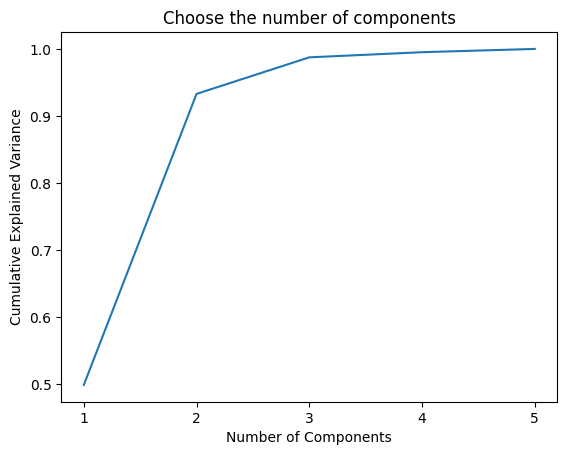

In [ ]:
# Visualization ot the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a list of number of components
components = np.arange(1, len(cumulative_variance) + 1)

# Plot the cumulative variance
plt.plot(components, cumulative_variance)

plt.xticks(np.arange(1, len(components) + 1, 1.0))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choose the number of components')

plt.show()

In [ ]:
# Print the cumulative variation
cumulative_variance

array([0.49890065, 0.93293692, 0.98744449, 0.99509625, 1.        ])

Using the output values of the cumulative variance and the graph, we choose the number of components for the PCA. We see that the optimal value to choose is three because it is the right combination of the number of components and the explained variance, which in this case is 0.98.

In [ ]:
pca = PCA(n_components=3)
numerical_data_pca = pca.fit_transform(numerical_data_norm)

In [ ]:
# Create a new dataframe with the new principal components
pca_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pca_df = pd.DataFrame(data=numerical_data_pca, columns=pca_columns)
pca_df.head()

,PC1,PC2,PC3
0,-0.019177,0.004259,0.000620
1,0.017952,-0.031740,-0.004562
2,-0.019177,0.004259,0.000620
3,-0.011229,-0.003976,-0.000804
4,-0.015081,0.007991,0.001953


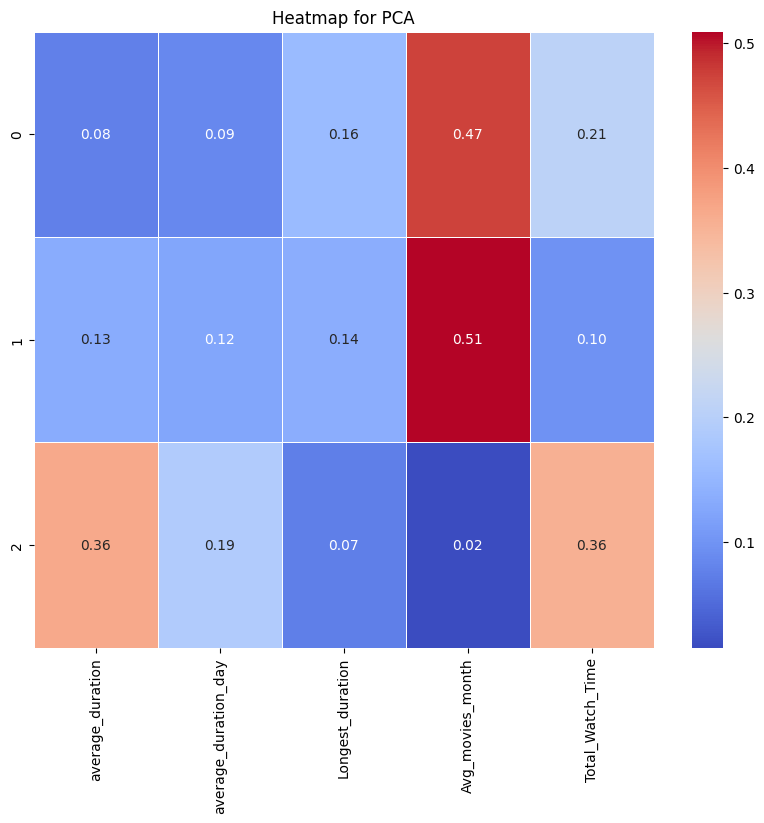

In [ ]:
# Calculate the correlation matrix for the principal components
pca_components_corr = pd.DataFrame(data=pca.components_, columns=numerical_cols)

# Visualiziation of the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components_corr**2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap for PCA')
plt.show()

We notice how the first and second components explain our 'Avg_movie_month' variables the most. While 'Total_watch_time' and 'average_duration' are explained by the third. In contrast, the variables 'average_duration_day' and 'Longest_duration' do not have high values in both of the three main components.

## Algorithmic Question

Federico studies in a demanding university where he has to take a certain number $N$ of exams to graduate, but he is free to choose in which order he will take these exams. He was given an initial personal score of $S$ when he enrolled, which changes every time he takes an exam. He soon discovered that every of the $N$ exams he has to take is assigned a mark $p$. Once he has chosen an exam, his score becomes equal to the mark $p$
, and at the same time, the scoring system changes:
* If he takes an "easy" exam (the score of the exam
being less than his score), every other exam's mark is increased by the quantity $S-p$.
*If he takes a "hard" exam (the score of the exam is greater than his score), every other exam's mark is decreased by the quantity $p-S$.

 Federico wants to know which is the highest score possible he could get.

**Input:**

**S** ->  initial personal score

**marks**->  list of marks


The initial approach taken to solve the algorithm is to address the problem through a recursive function.


In [ ]:
def max_score_possible(S, marks):
    # In case there are no more exams to take it return the current personal score S
    if len(marks) == 0:
        return S

    max_score = 0
    for i, new_score in enumerate(marks):
      # Calculate the update score
      marks_update=[x+(S-new_score) for idx, x in enumerate(marks) if idx !=i]
      # Recursive function that tries all possible combinations
      max_score = max(max_score, max_score_possible(new_score, marks_update))

    return max_score

**First Input:**

In [ ]:
initial_personal_score= 8
list_marks=[5,7,1]
result = max_score_possible(initial_personal_score, list_marks)
print(result)

11


**Second Input:**

In [ ]:
initial_personal_score= 25
list_marks=[18,24,21,32,27]
result = max_score_possible(initial_personal_score, list_marks)
print(result)

44


**Third Input:**

In [ ]:
initial_personal_score= 30
list_marks=[13,27,41,59,28,33,39,19,52,48,55,79]
result = max_score_possible(initial_personal_score, list_marks)
print(result)

205


Trying the different inputs given by the homework we see how the first two are solved quickly becuase we got in inputs only three and five exams, while the third having exactly twelve exams it has many combinations to try so the performance is much slower (27 minutes).

If we are going to consider n as the number of exams. The time complexity of the function 'max_score_possible' is $O(n!)$.This is because the initial loop has a time complexity $O(n)$, while the recursive function has a time complexity equal to $O(n!)$ in the worst-case scenario. Therefore, the algorithm 'max_score_possible' has $O(n!)$ as overall time complexity. We notice that the time complexity is high and can bring to slow performance, when the number of exams n increase. This can be observe in our third case.

Knowing that in the first case as the value of exams increases we do not have good performance, we go to use a new approach. Introducing a new variable called 'memo,' we memorize previously calculated results. This way, when a new calculation is needed, we first check if it has been computed before. In such cases, the stored result is retrieved immediately without redundant calculations. This updated version significantly improves performance by eliminating the need for repeated calculations.


In [ ]:
def max_score_possible_opt(S, marks, memo={}):
    # In case there are no more exams to take, return the current personal score S
    if len(marks) == 0: #O(1)
        return S

    # Check if we already have calculate the result
    if (S, tuple(marks)) in memo:  #O(1)
        return memo[(S, tuple(marks))]

    max_score = 0
    for i, new_score in enumerate(marks):
        # Calculate the updated score
        marks_update = [x + (S - new_score) for idx, x in enumerate(marks) if idx != i]  #O(n)
        # Recursive function that tries all possible combinations
        max_score = max(max_score, max_score_possible_opt(new_score, marks_update, memo))  #O(n)

    # memorize the result
    memo[(S, tuple(marks))] = max_score  #O(1)
    return max_score

**First Input:**

In [ ]:
initial_personal_score= 8
list_marks=[5,7,1]
result = max_score_possible_opt(initial_personal_score, list_marks)
print(result)

11


**Second Input:**

In [ ]:
initial_personal_score= 25
list_marks=[18,24,21,32,27]
result = max_score_possible_opt(initial_personal_score, list_marks)
print(result)

44


**Third Input:**

In [ ]:
initial_personal_score= 30
list_marks=[13,27,41,59,28,33,39,19,52,48,55,79]
result = max_score_possible_opt(initial_personal_score, list_marks)
print(result)

205


We notice with the optimized code how much faster it was to execute the third input which took 1 second compared to 27 minutes for the first algorithm that we wrote.

The overall time complexity of the function 'max_score_possible_opt' is $O(n^2)$. In the previous code next to each step we wrote the time complexity of each line. We notice how each element created in the marks_update loop has time complexity equal to $O(n)$, just as each call of the recursive function $O(n)$. While the remaining code is a constant time $O(1)$. This explains the total time complexity equal to $O(n^2)$.

Asking CHAT GPT for a third implementation:

In [ ]:
def max_score_possible_CHAT(S, marks, memo={}):
    if not marks:  # Check if marks is empty  #O(1)
        return S

    if (S, tuple(marks)) in memo:   #O(1)
        return memo[(S, tuple(marks))]

    max_score = 0  #O(1)
    for i, new_score in enumerate(marks):
        marks_update = [x + (S - new_score) for x in marks if x != new_score] #O(n)
        updated_score = max_score_possible_CHAT(new_score, marks_update, memo) #O(n)
        max_score = max(max_score, updated_score)

    memo[(S, tuple(marks))] = max_score   #O(1)
    return max_score

**First Input:**

In [ ]:
initial_personal_score= 8
list_marks=[5,7,1]
result = max_score_possible_CHAT(initial_personal_score, list_marks)
print(result)

11


**Second Input:**

In [ ]:
initial_personal_score= 25
list_marks=[18,24,21,32,27]
result = max_score_possible_CHAT(initial_personal_score, list_marks)
print(result)

44


**Third input:**

In [ ]:
initial_personal_score= 30
list_marks=[13,27,41,59,28,33,39,19,52,48,55,79]
result = max_score_possible_CHAT(initial_personal_score, list_marks)
print(result)

205


All the changes made by CHAT GPT:
- Removed the unnecessary check for len(marks) == 0 and replaced it with if not marks;
- Removed the unnecessary use of enumerate and directly used the values in the loop;
- Removed the redundant tuple conversion when checking for memoization;
- Changed the variable name x to score for better readability.



Calculating the time complexity of the new algorithm that has been optimized by CHAT GPT, we notice that it is the same as the previous one, i.e. $O(n^2)$.
The time complexity of this function can be calculated by considering the number of subproblems that are equal to $n$ for 'marks_update' and the time taken to solve each of them, that is equal to $O(n)$. Therefore, the time complexity of the algorithm is $O(n^2)$.